# TUTORIAL: Train YOLOv8 for Rock / Paper / Scissors game

*A guide to use Transfer Learning on YOLOv8 in order to play to the Rock / Paper / Scissors game through an AI Notebook.*

## Introduction

The purpose of this tutorial is to show how it is possible to train YOLOv8 to play to the game "rock paper scissors"!
YOLOv8 is an object detection algorithm. Although closely related to image classification, object detection performs image classification on a more precise scale. Object detection locates and categorizes features in images.

It is based on the YOLOv8 open source [repository](https://github.com/ultralytics/ultralytics).

## Code

The different steps are as follow:

- Download the Rock / Paper / Scissors Dataset
- Clone YOLOv8 repository
- Install YOLOv8 dependencies
- Import dependencies and check GPU availability
- Define the number of classes and YOLOv8 model architecture
- Recover YOLOv8 weights
- Run YOLOv8 training on Rock / Paper / Scissors dataset
- Display results of YOLOv8 training on Rock / Paper / Scissors dataset
- Test your YOLOv8 custom model on the Rock / Paper / Scissors test dataset
- Run YOLOv8 inference on new images
- Export trained weights for future inference

# Download the Rock / Paper / Scissors Dataset

The Rock / Paper / Scissors Dataset is available on <a href="https://universe.roboflow.com/roboflow-58fyf/rock-paper-scissors-sxsw">Roboflow</a>.

If you want to use this **Public Dataset** on the tutorial, follow the next requirements:

- create a Roboflow account
- click on `Download` in order to download the dataset
- select`YOLO v8 PyTorch` format
- choose the method `show download code`

You will get a URL (`<dataset_url>`) that will allow you to download your dataset directly inside the notebook.

Finally, replace `<dataset_url>` with yours in the following command:


In [ ]:
# go to the folder corresponding to your object container
%mkdir /workspace/data/rock-paper-scissors
%cd /workspace/data/rock-paper-scissors

!curl -L "https://universe.roboflow.com/ds/CfbtXZ5S1M?key=S07KJSXCf7" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip /workspace/data/rock-paper-scissors

## Install YOLOv8 dependencies
The easiest way to use YOLOv8 is to install Python dependency for ultralytics

In [ ]:
pip install ultralytics -U

## Import dependencies and check GPU availability

In [3]:
import ultralytics
from ultralytics import YOLO
import shutil

ultralytics.checks()

Ultralytics YOLOv8.0.168 🚀 Python-3.9.5 torch-2.0.1+cu117 CUDA:0 (Tesla V100S-PCIE-32GB, 32510MiB)
Setup complete ✅ (60 CPUs, 172.7 GB RAM, 1625.9/3519.5 GB disk)


## Recover YOLOv8 weights

In this tutorial, we will do **Transfer Learning** based on a YOLOv8 model pre-trained on the <a href="https://cocodataset.org/">COCO dataset</a>.

**How to define Transfer Learning?**

For both humans and machines, learning something new takes time and practice. However, it is easier to perform similar tasks to those already learned. As with humans, AI will be able to identify patterns from previous knowledge and apply them to new learning.

If a model is trained on a database, there is no need to re-train the model from scratch to fit a new set of similar data.

Main advantages of Transfer Learning:

- saving resources
- improving efficiency
- model training facilitation
- saving time

**What is the COCO dataset?**

COCO is a large-scale object detection, segmentation, and also captioning dataset. COCO has several features:

- Object segmentation
- Recognition in context
- Superpixel stuff segmentation
- 330K images
- 1.5 million object instances
- 80 object categories
- 91 stuff categories
- 5 captions per image
- 250 000 people with keypoints

In [4]:
# Get the YOLOv8 weights
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 104MB/s]


## Run YOLOv7 training on ASL Letters Dataset

Parameters definitions:

- device: cuda device.
- data: refers to the path to the yaml file.
- epochs: refers to the number of training epochs. An epoch corresponds to one cycle through the full training dataset.

In [8]:
result = model.train(data='/workspace/data/rock-paper-scissors/data.yaml', device=0, epochs=10)

Ultralytics YOLOv8.0.168 🚀 Python-3.9.5 torch-2.0.1+cu117 CUDA:0 (Tesla V100S-PCIE-32GB, 32510MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/workspace/data/rock-paper-scissors/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

> **Here you have an example for one epoch.**

## Display results of YOLOv8 training on Rock / Paper / Scissors dataset

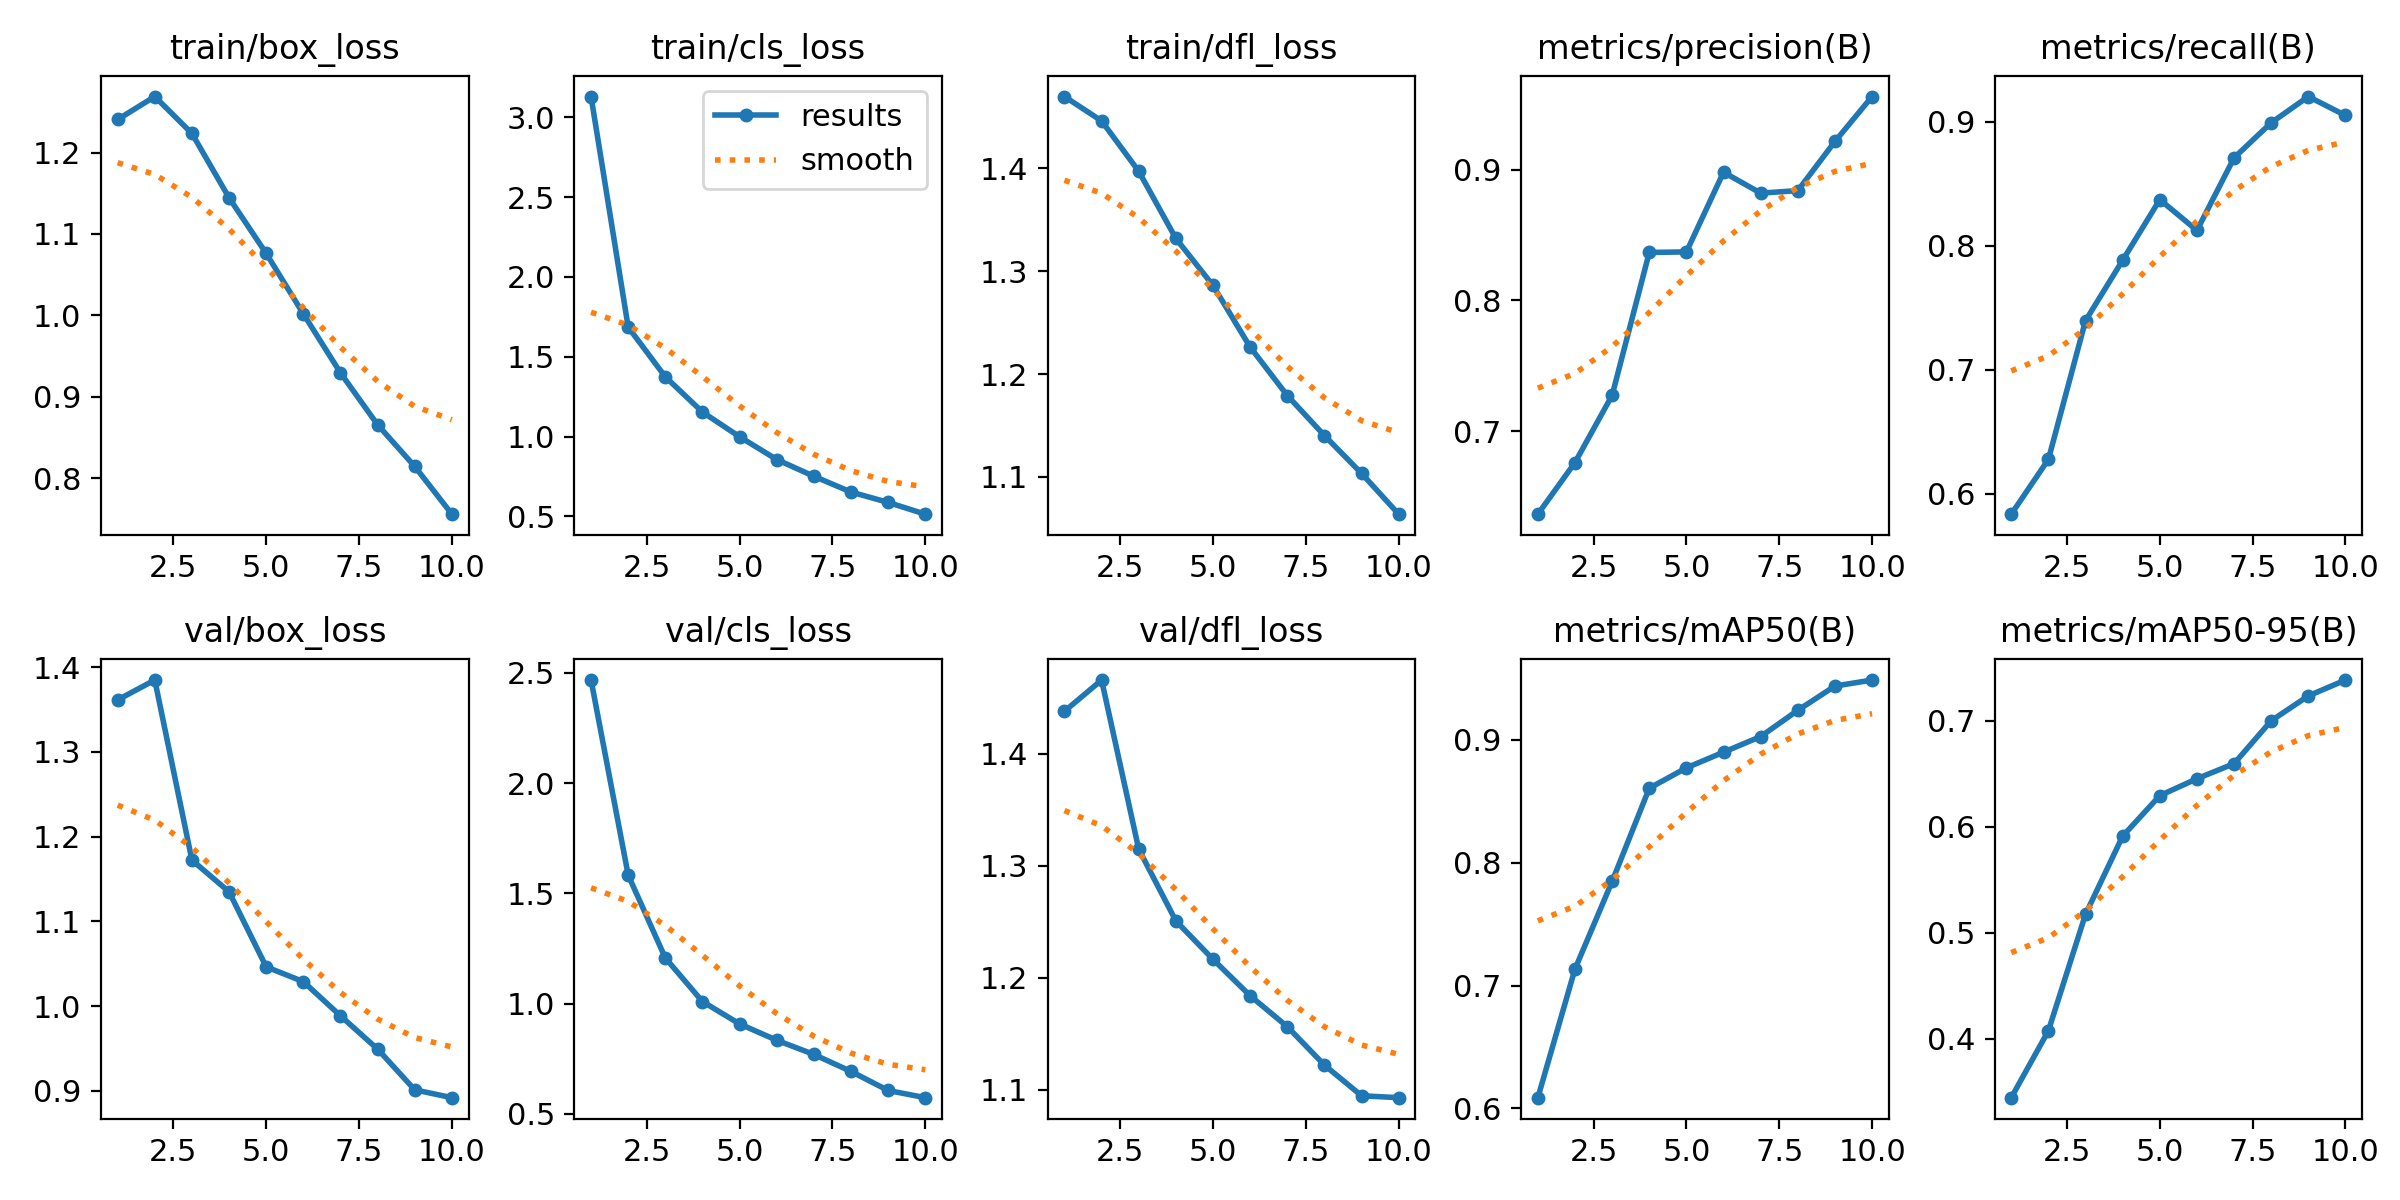

In [10]:
# to display images
from IPython.display import Image, clear_output
Image(filename='/workspace/data/rock-paper-scissors/runs/detect/train/results.png', width=1000)  # view results

#### Graphs and functions explanation

**Loss functions:**

*For the training set:*

- Box: loss due to a box prediction not exactly covering an object.
- Objectness: loss due to a wrong box-object IoU **[1]** prediction.
- Classification: loss due to deviations from predicting ‘1’ for the correct classes and ‘0’ for all the other classes for the object in that box.

*For the valid set (the same loss functions as for the training data):*

- val Box
- val Objectness
- val Classification

**Precision & Recall:**

- Precision: measures how accurate are the predictions. It is the percentage of your correct predictions
- Recall: measures how good it finds all the positives

*How to calculate Precision and Recall ?*

**Accuracy functions:**

mAP (mean Average Precision) compares the ground-truth bounding box to the detected box and returns a score. The higher the score, the more accurate the model is in its detections.

- mAP@ 0.5：when IoU is set to 0.5, the AP **[2]** of all pictures of each category is calculated, and then all categories are averaged : mAP
- mAP@ 0.5:0.95：represents the average mAP at different IoU thresholds (from 0.5 to 0.95 in steps of 0.05)

**[1] IoU (Intersection over Union)** = measures the overlap between two boundaries. It is used to measure how much the predicted boundary overlaps with the ground truth

*How to calculate IoU ?*

**[2] AP (Average precision)** = popular metric in measuring the accuracy of object detectors. It computes the average precision value for recall value over 0 to 1

## Test your YOLOv8 custom model on the Rock / Paper / Scissors test dataset

Perform inference on the contents of the `/workspace/data/test` folder.

In [13]:
# Export the weights
exportedWeights = model.export()
print(exportedWeights)

# Create the new model based on the weights
savedModel = YOLO(exportedWeights)

# Test of the new model
savedModel.predict('/workspace/data/rock-paper-scissors/test/images/20220216_221856_jpg.rf.c551cb3856f480cba36d6aa58e3300cd.jpg', verbose=True, save=True, conf=0.5)

Ultralytics YOLOv8.0.168 🚀 Python-3.9.5 torch-2.0.1+cu117 CUDA:0 (Tesla V100S-PCIE-32GB, 32510MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

TorchScript: starting export with torch 2.0.1+cu117...
TorchScript: export success ✅ 1.2s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (1.4s)
Results saved to /workspace/data/rock-paper-scissors/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=/workspace/data/rock-paper-scissors/data.yaml  
Visualize:       https://netron.app
Loading runs/detect/train/weights/best.torchscript for TorchScript inference...



runs/detect/train/weights/best.torchscript


image 1/1 /workspace/data/rock-paper-scissors/test/images/20220216_221856_jpg.rf.c551cb3856f480cba36d6aa58e3300cd.jpg: 640x640 1 Rock, 5.3ms
Speed: 1.7ms preprocess, 5.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Paper', 1: 'Rock', 2: 'Scissors'}
 orig_img: array([[[128, 195, 220],
         [129, 196, 221],
         [129, 196, 221],
         ...,
         [115, 189, 217],
         [115, 189, 217],
         [115, 189, 217]],
 
        [[128, 195, 220],
         [129, 196, 221],
         [129, 196, 221],
         ...,
         [115, 189, 217],
         [115, 189, 217],
         [115, 189, 217]],
 
        [[128, 195, 220],
         [129, 196, 221],
         [129, 196, 221],
         ...,
         [115, 189, 217],
         [115, 189, 217],
         [115, 189, 217]],
 
        ...,
 
        [[ 64,  77,  93],
         [ 62,  77,  93],
         [ 64,  77,  93],
         ...,
         [ 58,  71,  85],
         [ 59,  72,  86],
         [ 59,  72,  86]],
 
        [[ 66,  76,  93],
         [ 64,  77,  93],
         [ 66,  76,  93],
         ...,
    

## Run YOLOv7 inference on new images

⚠️ Upload a new image in the `/workspace/new-images/` folder ⚠️

In [15]:
savedModel.predict('/workspace/data/rock-paper-scissors/new-images/scissors4.jpg', verbose=True, save=True, conf=0.5)


image 1/1 /workspace/data/rock-paper-scissors/new-images/scissors4.jpg: 640x640 1 Scissors, 8.2ms
Speed: 4.3ms preprocess, 8.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Paper', 1: 'Rock', 2: 'Scissors'}
 orig_img: array([[[202, 200, 200],
         [202, 200, 200],
         [201, 199, 198],
         ...,
         [133, 125, 125],
         [131, 126, 125],
         [132, 127, 126]],
 
        [[202, 200, 200],
         [202, 200, 200],
         [201, 199, 198],
         ...,
         [133, 125, 125],
         [132, 127, 126],
         [132, 127, 126]],
 
        [[201, 199, 199],
         [201, 199, 199],
         [201, 199, 199],
         ...,
         [131, 125, 126],
         [131, 125, 126],
         [132, 126, 127]],
 
        ...,
 
        [[180, 174, 175],
         [179, 173, 174],
         [177, 171, 172],
         ...,
         [ 89,  99, 106],
         [ 92, 100, 107],
         [ 92, 101, 105]],
 
        [[181, 175, 176],
         [181, 175, 176],
         [180, 175, 176],
         ...,
    

You can show the resulting images: `/workspace/data/rock-paper-scissors/runs/detect/predict`

## Export trained weights for future inference



In [18]:
# Copy the final model to the /workspace/model folder
%mkdir /workspace/model/rock-paper-scissors
shutil.copy(exportedWeights, '/workspace/model/rock-paper-scissors/')

mkdir: cannot create directory ‘/workspace/model/rock-paper-scissors’: File exists


'/workspace/model/rock-paper-scissors/best.torchscript'